In [2]:
# testing the automatic save all new tdr file!!

import os
import xarray as xr
os.chdir(  "/Users/etmu9498/research/code/scripts/save-new-datasets")
import save_tdr_data

# tdr_data = save_one_tdr( 'grace', 2)

save_tdr_data.save_all_tdr()

New TDR File Created and Saved: tdr-grace-08-18-eye-1.nc
New TDR File Created and Saved: tdr-grace-08-18-eye-2.nc
New TDR File Created and Saved: tdr-grace-08-18-eye-3.nc
New TDR File Created and Saved: tdr-grace-08-19-eye-1.nc
New TDR File Created and Saved: tdr-grace-08-19-eye-2.nc
New TDR File Created and Saved: tdr-grace-08-19-eye-3.nc
New TDR File Created and Saved: tdr-henri-08-20-eye-1.nc
New TDR File Created and Saved: tdr-henri-08-20-eye-3.nc
New TDR File Created and Saved: tdr-henri-08-21-eye-1.nc
New TDR File Created and Saved: tdr-henri-08-21-eye-2.nc
New TDR File Created and Saved: tdr-henri-08-21-eye-3.nc
New TDR File Created and Saved: tdr-ida-08-27-eye-1.nc
New TDR File Created and Saved: tdr-ida-08-27-eye-2.nc
New TDR File Created and Saved: tdr-ida-08-27-eye-7.nc
New TDR File Created and Saved: tdr-ida-08-29-eye-2.nc
New TDR File Created and Saved: tdr-sam-09-26-eye-1.nc
New TDR File Created and Saved: tdr-sam-09-26-eye-2.nc
New TDR File Created and Saved: tdr-sam-09-

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import warnings
import datetime

os.chdir(  "/Users/etmu9498/research/code/scripts")
import tc_metadata
import make_plots
import helper_fns

[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan -92.13700104
 -92.12319946 -92.10569763 -92.0904007  -92.07530212 -92.06020355
 -92.04499817 -92.03009796 -92.01480103 -91.99919891 -91.98329926
 -91.96759796 -91.95200348 -91.93640137 -91.91840363 -91.90170288
 -91.88600

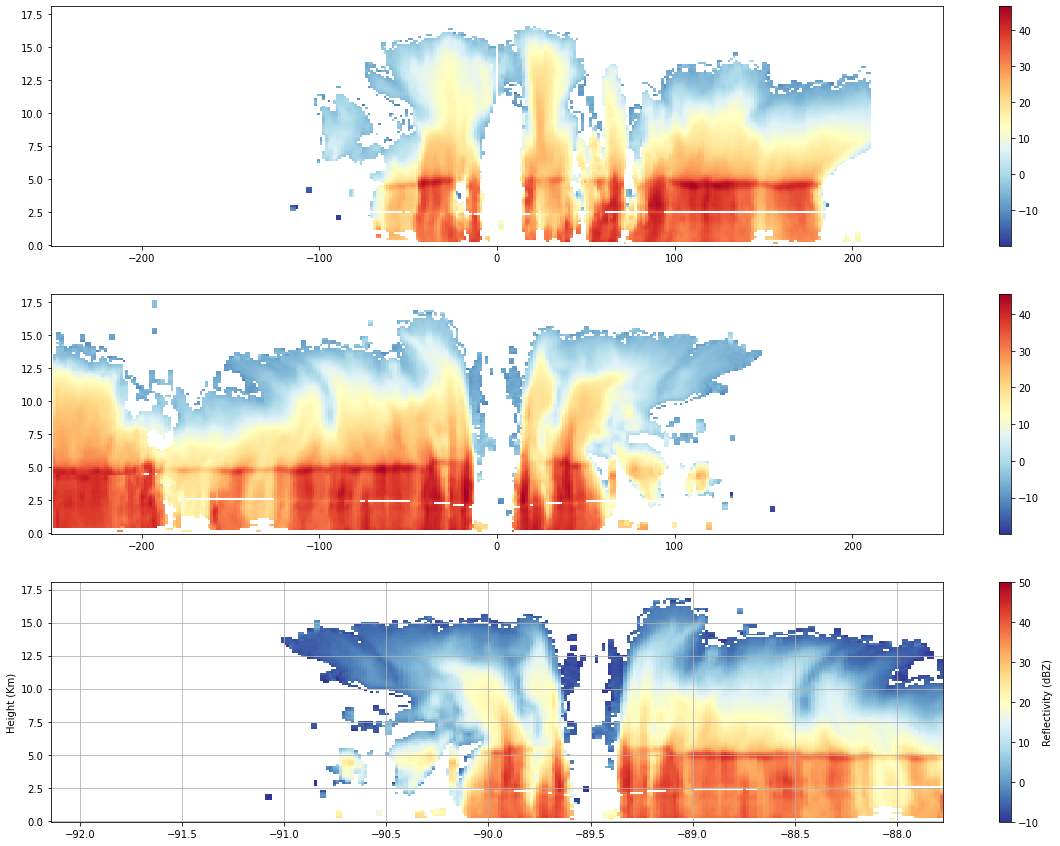

In [4]:
# test plotting a few of the new tdr datasets... the plots match, so my script works... yay!!!
import os
import xarray as xr
import matplotlib.pyplot as plt

tdr_path = "/Users/etmu9498/research/data/tdr-new"
os.chdir( tdr_path)
tdr_data = xr.open_dataset( 'tdr-grace-08-18-eye-3.nc')
tdr_data2 = xr.open_dataset( 'tdr-sam-09-29-eye-2.nc')
tdr_data3 = xr.open_dataset( 'tdr-ida-08-29-eye-2.nc')
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

plt.figure( figsize=( 20, 15))
plt.subplot(311)
plt.pcolormesh( tdr_data.distance, tdr_data.height, tdr_data.REFLECTIVITY, cmap=color_map)
plt.colorbar()

plt.subplot(312)
plt.pcolormesh( tdr_data3.distance, tdr_data3.height, tdr_data3.REFLECTIVITY, cmap=color_map)
plt.colorbar()

plt.subplot(313)
# plt.pcolormesh( tdr_data3.distance, tdr_data3.height, tdr_data3.REFLECTIVITY, cmap=color_map)

print( tdr_data3.longitude.values)

make_plots.plot_new_tdr( tdr_path, 'tdr-ida-08-29-eye-2.nc', xaxis='lon')
# plt.xlim( [-92, -87])

In [10]:
# calculate the average vertical and horizontal resolution of CRL data

# view + choose data
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
crl_list = make_plots.load_crl( crl_path, print_files=False)

os.chdir( crl_path)
data = xr.open_dataset( crl_list[ 12])

number_points = len( data.H)
height = (- data.H[0] + data.H[-1] ) * 1000
height = height.values

print( "Average height resolution of CRL data: " + str( height / number_points) + ' m')

tot_time_secs =  ( data.time[-1] - data.time[0] ) * 60 * 60 # total flight time in seconds
bins = len( data.time)
avg_bin_time = tot_time_secs / bins # how long it takes to cross one dat point / bin
p3_speed = 110 # speed of plane in m/s

avg_bin_dist = avg_bin_time * p3_speed
print( "Average horizontal resolution of CRL data: " + str( avg_bin_dist.values) + ' m')



# calculate the average vertical and horizontal resolution of tdr data
tdr_path = "/Users/etmu9498/research/data/tdr-new"
os.chdir( tdr_path)
data = xr.open_dataset( 'tdr-grace-08-18-eye-1.nc')

number_points = len( data.height) - 1
height = ( data.height[0] + data.height[-1] ) * 1000
height = height.values

print( "Average height resolution of TDR data: " + str( height / number_points) + ' m')

bins = len( data.distance) - 1
distance = ( data.distance[0] - data.distance[ -1]) * 1000
avg_bin_dist = distance / bins
print( "Average horizontal resolution of TDR data: " + str( avg_bin_dist.values) + ' m')

data

Average height resolution of CRL data: 5.989899137606123 m
Average horizontal resolution of CRL data: 220.33052890477933 m
Average height resolution of TDR data: 150.0 m
Average horizontal resolution of TDR data: 1500.0 m


<xarray.Dataset>
Dimensions:          (time: 1, height: 121, heading: 1, distance: 335)
Coordinates:
  * time             (time) float32 7.875e+04
  * height           (height) float32 0.0 0.15 0.3 0.45 ... 17.7 17.85 18.0
  * heading          (heading) float32 15.0
  * distance         (distance) float64 250.5 249.0 247.5 ... -249.0 -250.5
Data variables: (12/15)
    azimuth          (distance) float64 ...
    altitude         (distance) float64 ...
    latitude         (distance) float64 ...
    longitude        (distance) float64 ...
    seconds          (distance) float64 ...
    u air            (distance) float64 ...
    ...               ...
    ws air           (distance) float64 ...
    Radial_wind      (height, distance) float64 ...
    Tangential_Wind  (height, distance) float64 ...
    Vertical_wind    (height, distance) float64 ...
    Wind_Speed       (height, distance) float64 ...
    REFLECTIVITY     (height, distance) float64 ...
Attributes: (12/38)
    KEYWORD:                                                WIND
    FLTNAME:                                                210818H1
    STMNAME:                                                GRACE
    RADAR:                                                  TAIL
    EXPERIMENT:                                             GRACE
    CREATIME:                                               unknown
    ...                                                     ...
    BIEL:                                                   -999.0
    AZBIEL:                                                 -999.0
    STIME2:                                                 78746.0
    ETIME1:                                                 78746.0
    EXTRA6:                                                 -999.0
    EXTRA7:                                                 -999.0

In [3]:
# get metadata for a specific tc example 
tcname = 'grace'
dataset = 2

metadata = tc_metadata.all_data( tc= tcname)


crl_name = tc_metadata.choose_crl_date( metadata[ 'dates'][ dataset], metadata[ 'crl_list'])
in_situ_name = tc_metadata.choose_in_situ_date( metadata[ 'dates'][ dataset], metadata[ 'in_situ_list'])
inbound_name, outbound_name = tc_metadata.choose_tdr_data( tcname, metadata[ 'tdr_list'], dataset)
print( metadata)

{'crl_path': '/Users/etmu9498/research/data/CRL_data/2021', 'tdr_path': '/Users/etmu9498/research/data/tdr/grace/nc-files', 'in_situ_path': '/Users/etmu9498/research/data/in-situ', 'crl_list': ['P3_20210811H1_200000-224759.cdf', 'P3_20210812H1_095513-125927.cdf', 'P3_20210812H2_212248-235510.cdf', 'P3_20210813H1_091801-113558.cdf', 'P3_20210816H1_085245-123459.cdf', 'P3_20210816H1_090000-102359.cdf', 'P3_20210817H1_094204-132058.cdf', 'P3_20210818H1_211425-244159.cdf', 'P3_20210819H1_213003-244159.cdf', 'P3_20210820H1_212402-245958.cdf', 'P3_20210821H2_213903-225658.cdf', 'P3_20210821H2_213903-262058.cdf', 'P3_20210827H1_203112-275220.cdf', 'P3_20210828H1_200115-221321.cdf', 'P3_20210829H1_171201-223719.cdf', 'P3_20210925H1_211201-243558.cdf', 'P3_20210926H1_220900-255058.cdf', 'P3_20210927H1_213003-253558.cdf', 'P3_20210929H2_211201-261159.cdf'], 'tdr_list': ['210816H1_1101_vert_inbound.nc', '210816H1_1101_vert_outbound.nc', '210816H1_1215_vert_inbound.nc', '210816H1_1215_vert_outboun

In [4]:
# load tdr data
os.chdir( metadata[ 'tdr_path'])
inbound_data = xr.open_dataset( inbound_name)
outbound_data = xr.open_dataset( outbound_name)

# time tdr datasets were recorded?
print( np.nanmin( inbound_data.seconds.values) / 3600)
print( np.nanmax( inbound_data.seconds.values) / 3600)

print( np.nanmin( outbound_data.seconds.values) / 3600)
print( np.nanmax( outbound_data.seconds.values) / 3600)

# print out the sizes of all variables in inbound_data!
var_list = list( inbound_data.keys() )
for key in var_list:
    try:
        print( 'shape of 2D ' + key + ': ' + str( np.size( inbound_data[ key].isel(time=0).isel(heading=0) , 0)) + ' x ' + str( np.size( inbound_data[ key].isel(time=0).isel(heading=0), 1)) )
    except (IndexError, ValueError):
        print( 'Size of 1D ' + key + ': ' + str( np.size( inbound_data[ key] )) )
        continue
        
outbound_data

24.0175
24.379166666666666
24.386111111111113
24.85
Size of 1D azimuth: 167
Size of 1D altitude: 167
Size of 1D latitude: 167
Size of 1D longitude: 167
Size of 1D seconds: 167
Size of 1D u air: 167
Size of 1D v air: 167
Size of 1D w air: 167
Size of 1D vgw air: 167
Size of 1D ws air: 167
shape of 2D Radial_wind: 167 x 121
shape of 2D Tangential_Wind: 167 x 121
shape of 2D Vertical_wind: 167 x 121
shape of 2D Wind_Speed: 167 x 121
shape of 2D REFLECTIVITY: 167 x 121


<xarray.Dataset>
Dimensions:          (time: 1, height: 121, heading: 1, radius: 167)
Coordinates:
  * time             (time) float32 8.778e+04
  * height           (height) float32 0.0 0.15 0.3 0.45 ... 17.7 17.85 18.0
  * heading          (heading) float32 15.0
  * radius           (radius) float32 1.5 3.0 4.5 6.0 ... 247.5 249.0 250.5
Data variables: (12/15)
    azimuth          (radius) float32 ...
    altitude         (radius) float32 ...
    latitude         (radius) float32 ...
    longitude        (radius) float32 ...
    seconds          (radius) float32 8.779e+04 8.78e+04 8.781e+04 ... nan nan
    u air            (radius) float32 ...
    ...               ...
    ws air           (radius) float32 ...
    Radial_wind      (radius, heading, height, time) float32 ...
    Tangential_Wind  (radius, heading, height, time) float32 ...
    Vertical_wind    (radius, heading, height, time) float32 ...
    Wind_Speed       (radius, heading, height, time) float32 ...
    REFLECTIVITY     (radius, heading, height, time) float32 ...
Attributes: (12/38)
    KEYWORD:                                                WIND
    FLTNAME:                                                210818H1
    STMNAME:                                                GRACE
    RADAR:                                                  TAIL
    EXPERIMENT:                                             GRACE
    CREATIME:                                               unknown
    ...                                                     ...
    BIEL:                                                   -999.0
    AZBIEL:                                                 -999.0
    STIME2:                                                 87778.0
    ETIME1:                                                 87778.0
    EXTRA6:                                                 -999.0
    EXTRA7:                                                 -999.0

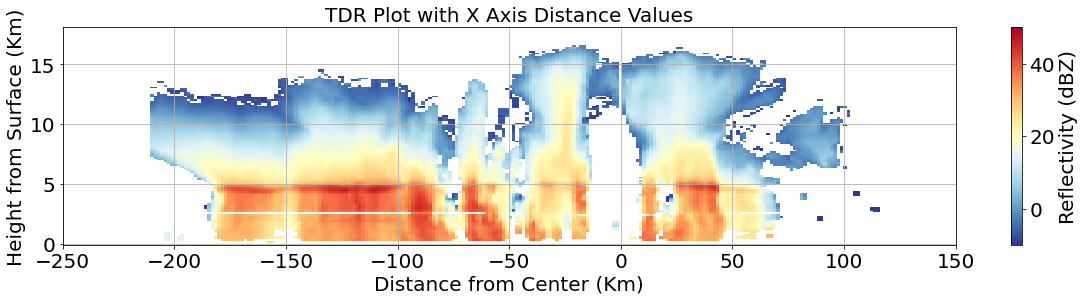

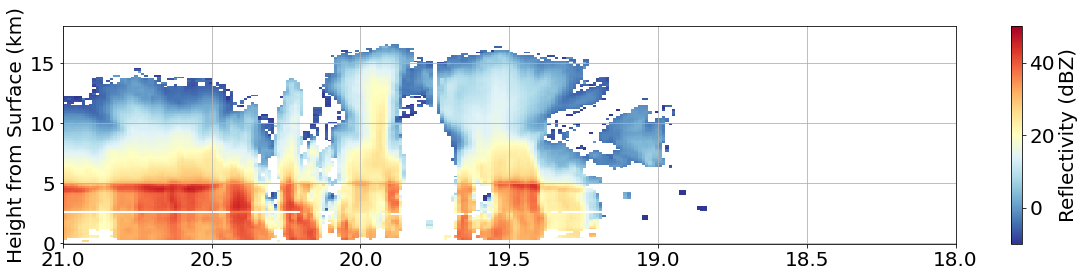

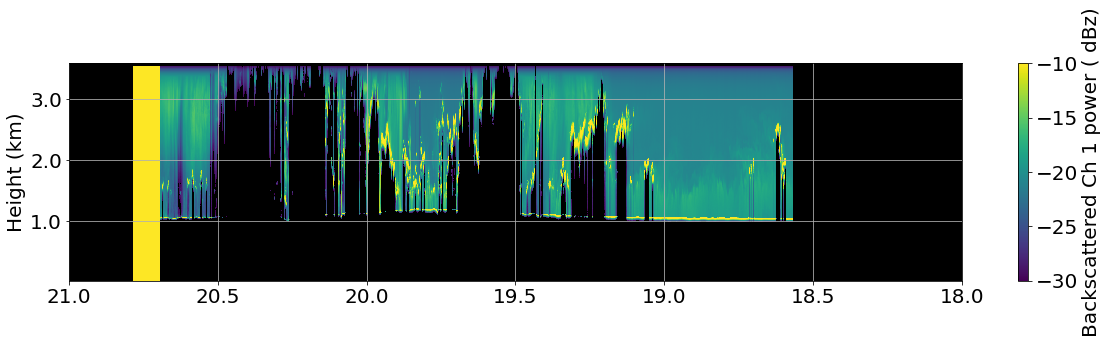

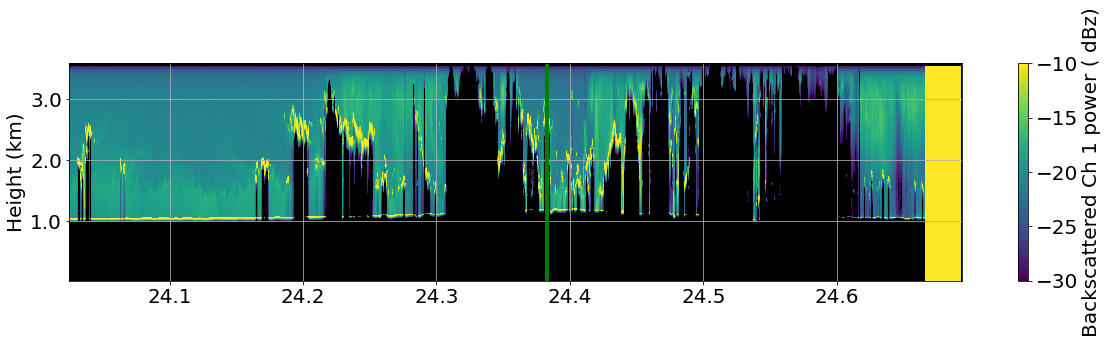

In [5]:
# plot tdr data in distance form, and add some additional automatic plots for comparisons

# choose arbitrary limits for distance data to get things to match nicely
dist_lims = [-250, 150] # [ -170, 220]

x_in = inbound_data.radius
x_out = - outbound_data.radius
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

out_reflectivity = outbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()
in_reflectivity = inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose()

# make the plot manually
helper_fns.change_font_sizes(small='20', medium='20') # make font sizes larger with a helper function

fig = plt.figure( figsize= (20, 4))
ax = fig.add_subplot( 1, 1, 1)
ax.pcolormesh( x_out, outbound_data.height, out_reflectivity, cmap = color_map, vmin= -10, vmax = 50 )
ax.pcolormesh( x_in, inbound_data.height, in_reflectivity, cmap = color_map, vmin= -10, vmax = 50 )

# make a colorbar
map = matplotlib.cm.ScalarMappable(cmap= color_map, norm= matplotlib.colors.Normalize(vmin= -10, vmax= 50))
fig.colorbar(mappable = map, label="Reflectivity (dBZ)")

# make the plot pretty
ax.grid( 'on')
ax.set_xlabel( 'Distance from Center (Km)')
ax.set_ylabel( 'Height from Surface (Km)')
ax.set_title( "TDR Plot with X Axis Distance Values")
ax.set_xlim( dist_lims)


# make the plot, but using automatic function this time
# plt.figure( figsize= (20, 4))
# make_plots.plot_tdr( metadata[ 'tdr_path'], inbound_name, outbound_name, 'dist')
# plt.xlim( dist_lims)

plt.figure( figsize= (20, 4))
make_plots.plot_tdr( metadata[ 'tdr_path'], inbound_name, outbound_name, 'lat')
plt.xlim( metadata[ 'xlims'][ dataset])

plt.figure( figsize= (20, 4))
make_plots.plot_power_ch1( metadata[ 'crl_path'], crl_name, metadata[ 'crl_range'][ dataset][0], metadata[ 'crl_range'][ dataset][1], 'lat')
plt.xlim( metadata[ 'xlims'][ dataset])

plt.figure( figsize= (20, 4))
make_plots.plot_power_ch1( metadata[ 'crl_path'], crl_name, metadata[ 'crl_range'][ dataset][0], metadata[ 'crl_range'][ dataset][1], 'time')
plt.axvline( x = inbound_data.time.values / 3600, c='g', linewidth=4)

(-250.0, 150.0)

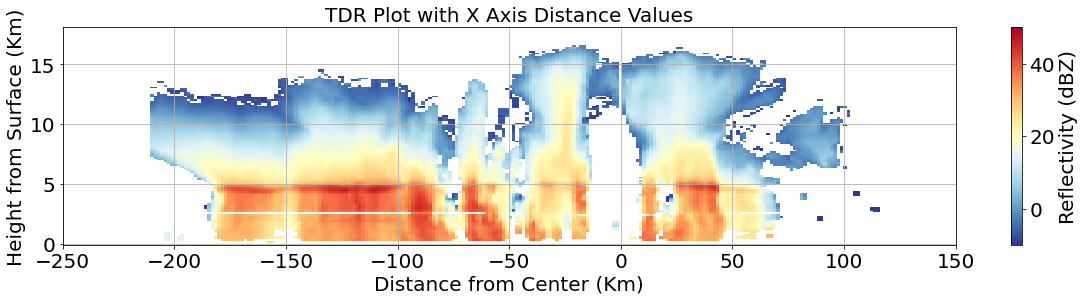

In [6]:
# put distance and reflectivity values from outbound and inbound data into single arrays for plotting and eventual saving!

# convert from xr to np to concatonate arrays
x_in = inbound_data.radius
x_out = - outbound_data.radius
x_in = xr.DataArray.to_numpy( x_in)
x_out = xr.DataArray.to_numpy( x_out)

# flip outbound data so everything is in order when concatonating!
x_out = np.flip( x_out, 0)

# create one distance array! add a 0 km data point to keep things even, too :)
x_in = np.append( [0.0], x_in)
distance_array = np.append( x_out, x_in)

out_reflectivity = outbound_data["REFLECTIVITY"].isel(time=0).isel(heading=0).transpose().values
# since the outbound data was flipped, the inbound data needs to be flipped, too!
out_reflectivity = np.flip( out_reflectivity, 1)
in_reflectivity = inbound_data.REFLECTIVITY.isel(time=0).isel(heading=0).transpose().values

# add one empty vertical column of data to account for empty 0 km data point
nan_pad = np.empty(  (len( outbound_data.height), 1) )  
nan_pad[:] = np.nan
in_reflectivity = np.append( nan_pad, in_reflectivity, axis=1) 
refl = np.append( out_reflectivity, in_reflectivity, axis=1)


# make a tdr plot manually
helper_fns.change_font_sizes(small='20', medium='20') # make font sizes larger with a helper function
fig = plt.figure( figsize= (20, 4))
ax = fig.add_subplot( 1, 1, 1)
ax.pcolormesh( distance_array, inbound_data.height, refl, cmap = color_map, vmin= -10, vmax = 50 )
# make a colorbar
map = matplotlib.cm.ScalarMappable(cmap= color_map, norm= matplotlib.colors.Normalize(vmin= -10, vmax= 50))
fig.colorbar(mappable = map, label="Reflectivity (dBZ)")
# make the plot pretty
ax.grid( 'on')
ax.set_xlabel( 'Distance from Center (Km)')
ax.set_ylabel( 'Height from Surface (Km)')
ax.set_title( "TDR Plot with X Axis Distance Values")
ax.set_xlim( dist_lims)


In [7]:
# trying to save the newly created distance_array and refl as a coordinate and variable, respectively, in xarray

tdr_data = inbound_data.copy() # not sure if the .copy() is necessary?
# tdr_data

# tdr_data.drop_dims( 'radius') # this didn't work
# del tdr_data[ 'radius'] # this kinda worked

tdr_data = tdr_data[ ['time', 'height', 'heading']] # this works really well at dropping all the coords, dims, and vars not listed!!

tdr_data = tdr_data.assign_coords( {'distance': distance_array})

tdr_data.distance.attrs['UNITS'] = 'meters'
tdr_data.distance.attrs['STANDARD_NAME'] = 'distance'
tdr_data.distance.attrs['AXIS'] = 'X'

tdr_data = tdr_data.assign( {'reflectivity': ( ('height', 'distance'), refl) })

tdr_data

<xarray.Dataset>
Dimensions:       (time: 1, height: 121, heading: 1, distance: 335)
Coordinates:
  * time          (time) float32 8.778e+04
  * height        (height) float32 0.0 0.15 0.3 0.45 ... 17.55 17.7 17.85 18.0
  * heading       (heading) float32 15.0
  * distance      (distance) float64 -250.5 -249.0 -247.5 ... 247.5 249.0 250.5
Data variables:
    reflectivity  (height, distance) float64 nan nan nan nan ... nan nan nan nan
Attributes: (12/38)
    KEYWORD:                                                WIND
    FLTNAME:                                                210818H1
    STMNAME:                                                GRACE
    RADAR:                                                  TAIL
    EXPERIMENT:                                             GRACE
    CREATIME:                                               unknown
    ...                                                     ...
    BIEL:                                                   -999.0
    AZBIEL:                                                 -999.0
    STIME2:                                                 87778.0
    ETIME1:                                                 87778.0
    EXTRA6:                                                 -999.0
    EXTRA7:                                                 -999.0

In [8]:
# trying to make a script to accomplish loading data like above, but automatically for all variables!


# save the names of all the variables in the original xarray dataset to:
var_list = list( inbound_data.keys() )
print( var_list)
print( len( tdr_data.distance))

# clear out the data array like in the cell above
tdr_data = inbound_data.copy() 
tdr_data = tdr_data[ ['time', 'height', 'heading']] 
tdr_data = tdr_data.assign_coords( {'distance': distance_array })
tdr_data.distance.attrs['UNITS'] = 'meters'
tdr_data.distance.attrs['STANDARD_NAME'] = 'distance'
tdr_data.distance.attrs['AXIS'] = 'X'

# make a list of new, clearer names to save the variables to!
new_names = ['azimuth', 'altitude', 'latitude', 'longitude', 'seconds', 'u_air', 'v_air', 'w_air',
             'vgw_air', 'ws_air', 'radial_wind', 'tangential_wind', 'vertical_wind', 'wind_speed', 'reflectivity']

# save all the new values to the array!
for key_ind in range( len( var_list)):
    # saving 2D arrays
    try:
        out_vals = outbound_data[ var_list[ key_ind]].isel(time=0).isel(heading=0).transpose().values
        out_vals = np.flip( out_vals, 1)
        in_vals = inbound_data[ var_list[ key_ind]].isel(time=0).isel(heading=0).transpose().values

        # add one empty vertical column of data to account for empty 0 km data point
        nan_pad = np.empty(  (len( outbound_data.height), 1) ) # create an empty array 
        nan_pad[:] = np.nan # fill it with nans

        # combine the three new datasetS!
        in_vals = np.append( nan_pad, in_vals, axis=1) 
        all_vals = np.append( out_vals, in_vals, axis=1)
        tdr_data = tdr_data.assign( { var_list[ key_ind]: ( ('height', 'distance'), all_vals) })
        
    # saving 1D arrays
    except (IndexError, ValueError):
        # set up the correct variables
        in_vals = inbound_data[ var_list[ key_ind]]
        out_vals = outbound_data[ var_list[ key_ind]]
        in_vals = xr.DataArray.to_numpy( in_vals)
        out_vals = xr.DataArray.to_numpy( out_vals)

        # flip outbound data so everything is in order when concatonating!
        out_vals = np.flip( out_vals, 0)

        # create one distance array! add a 0 km data point to keep things even, too :)
        in_vals = np.append( [np.nan], in_vals)
        all_vals = np.append( out_vals, in_vals)

        tdr_data = tdr_data.assign( { var_list[ key_ind]: (('distance'), all_vals ) })
        # print( 'Size of 1D ' + var_list[ key_ind] + ': ' + str( np.size( inbound_data[ var_list[ key_ind]] )) )        
        
    # add all the attribute metadata to the new dataset!
    # get the old metadata
    attr_dict = inbound_data[ var_list[ key_ind]].attrs
    # recursively add all keys to new dataset!
    for key2 in attr_dict:
        tdr_data[ var_list[ key_ind]].attrs[ key2] = attr_dict[ key2]
        
tdr_data

['azimuth', 'altitude', 'latitude', 'longitude', 'seconds', 'u air', 'v air', 'w air', 'vgw air', 'ws air', 'Radial_wind', 'Tangential_Wind', 'Vertical_wind', 'Wind_Speed', 'REFLECTIVITY']
335


<xarray.Dataset>
Dimensions:          (time: 1, height: 121, heading: 1, distance: 335)
Coordinates:
  * time             (time) float32 8.778e+04
  * height           (height) float32 0.0 0.15 0.3 0.45 ... 17.7 17.85 18.0
  * heading          (heading) float32 15.0
  * distance         (distance) float64 -250.5 -249.0 -247.5 ... 249.0 250.5
Data variables: (12/15)
    azimuth          (distance) float64 nan nan nan nan nan ... nan nan nan nan
    altitude         (distance) float64 nan nan nan nan nan ... nan nan nan nan
    latitude         (distance) float64 nan nan nan nan nan ... nan nan nan nan
    longitude        (distance) float64 nan nan nan nan nan ... nan nan nan nan
    seconds          (distance) float64 nan nan nan nan nan ... nan nan nan nan
    u air            (distance) float64 nan nan nan nan nan ... nan nan nan nan
    ...               ...
    ws air           (distance) float64 nan nan nan nan nan ... nan nan nan nan
    Radial_wind      (height, distance) float64 nan nan nan nan ... nan nan nan
    Tangential_Wind  (height, distance) float64 nan nan nan nan ... nan nan nan
    Vertical_wind    (height, distance) float64 nan nan nan nan ... nan nan nan
    Wind_Speed       (height, distance) float64 nan nan nan nan ... nan nan nan
    REFLECTIVITY     (height, distance) float64 nan nan nan nan ... nan nan nan
Attributes: (12/38)
    KEYWORD:                                                WIND
    FLTNAME:                                                210818H1
    STMNAME:                                                GRACE
    RADAR:                                                  TAIL
    EXPERIMENT:                                             GRACE
    CREATIME:                                               unknown
    ...                                                     ...
    BIEL:                                                   -999.0
    AZBIEL:                                                 -999.0
    STIME2:                                                 87778.0
    ETIME1:                                                 87778.0
    EXTRA6:                                                 -999.0
    EXTRA7:                                                 -999.0

In [9]:
# save new tdr_data file!
filename = 'tdr-' + metadata[ 'tc_name'].lower() + '-' + metadata[ 'dates'][ dataset] + '-eye-' + metadata[ 'eye_pass'][ dataset] + '.nc'
print( filename)
tdr_data.to_netcdf('/Users/etmu9498/research/data/tdr-new/' + filename)

tdr-grace-08-18-eye-3.nc


(19.0, 21.5)

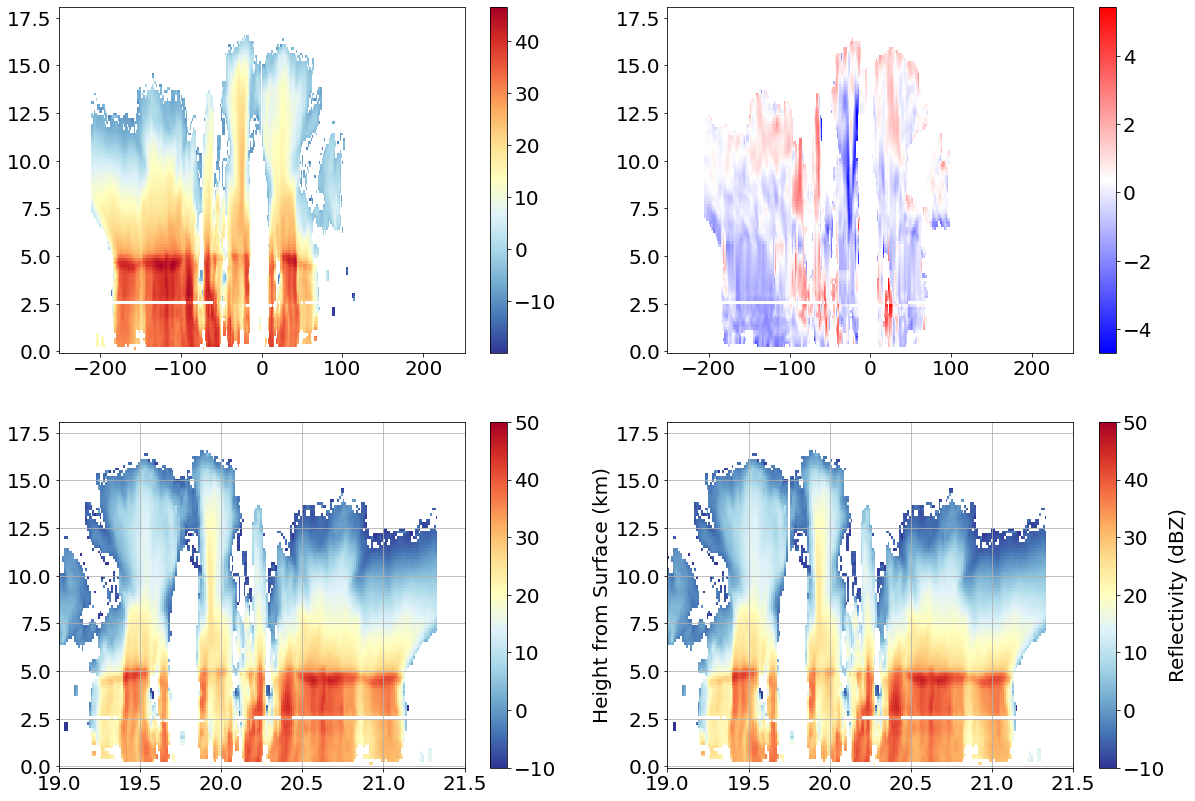

In [10]:
# testing to make sure that this script works!

plt.figure( figsize=( 20, 14))
plt.subplot(221)
plt.pcolormesh( tdr_data.distance, tdr_data.height, tdr_data.REFLECTIVITY, cmap=color_map)
plt.colorbar()

plt.subplot(222)
plt.pcolormesh( tdr_data.distance, tdr_data.height, tdr_data.Vertical_wind, cmap='bwr')
plt.colorbar()


# trying to plot reflectivity vs height vs lat 
# pcolormesh returns an error when x axis has nans in it, so the following code gets rid of the nans and 
plt.subplot(223)

# make a list of indices for latitude values
lat_ind = range( len( tdr_data.latitude))
# turn all indices with a Nan value into a 0
# a value other than 0 can be used here too, maybe something really big
lat_no_nan_ind = np.where( np.isnan( tdr_data.latitude), 0, lat_ind)
# get rid of all zeros
# this might unfairly get rid of the first data point (aka ind 0), but that's usually a nan anyways!
lat_no_nan_ind = lat_no_nan_ind[ lat_no_nan_ind != 0]

# only select non nan latitude values
lat = tdr_data.latitude[ lat_no_nan_ind]
# trim reflectivity data to match the smaller x axis
refl = tdr_data.REFLECTIVITY[:, lat_no_nan_ind]

# old code
# mask nan values in latitude 
# lat = np.ma.masked_where( np.isnan( tdr_data.latitude), tdr_data.latitude) # np.ma.masked_invalid( tdr_data.latitude)
# refl = np.ma.masked_where( np.isnan( tdr_data.reflectivity), tdr_data.reflectivity) # np.ma.masked_invalid( tdr_data.reflectivity)
# lat = tdr_data.latitude
# lat = np.where( np.isnan( tdr_data.latitude.values), 0, tdr_data.latitude.values) 

plt.pcolormesh( lat, tdr_data.height, refl, cmap=color_map, vmin = -10, vmax= 50)
plt.colorbar()
plt.grid( 'on')
plt.xlim( [19, 21.5])

plt.subplot(224)
make_plots.plot_tdr( metadata[ 'tdr_path'], inbound_name, outbound_name, 'lat')
plt.xlim( [19, 21.5])